# Predictive analysis using Wisconsin breast cancer data set

In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("data.csv",header = 0)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Prepare Data

In [3]:
# Remove unnecessary columns
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [4]:
# Encode diagnosis as numerical values(B=0, M=1)
le = preprocessing.LabelEncoder()
le.fit(['M', 'B'])

df['diagnosis'] = le.transform(df['diagnosis'])

In [5]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Visualize Data

In [6]:
# Separate out malignant and benign data for graphing
malignant = df[df['diagnosis'] ==1]
benign = df[df['diagnosis'] ==0]

In [7]:
# Column names to observe in following graphs - mean values only
observe = list(df.columns[1:11])

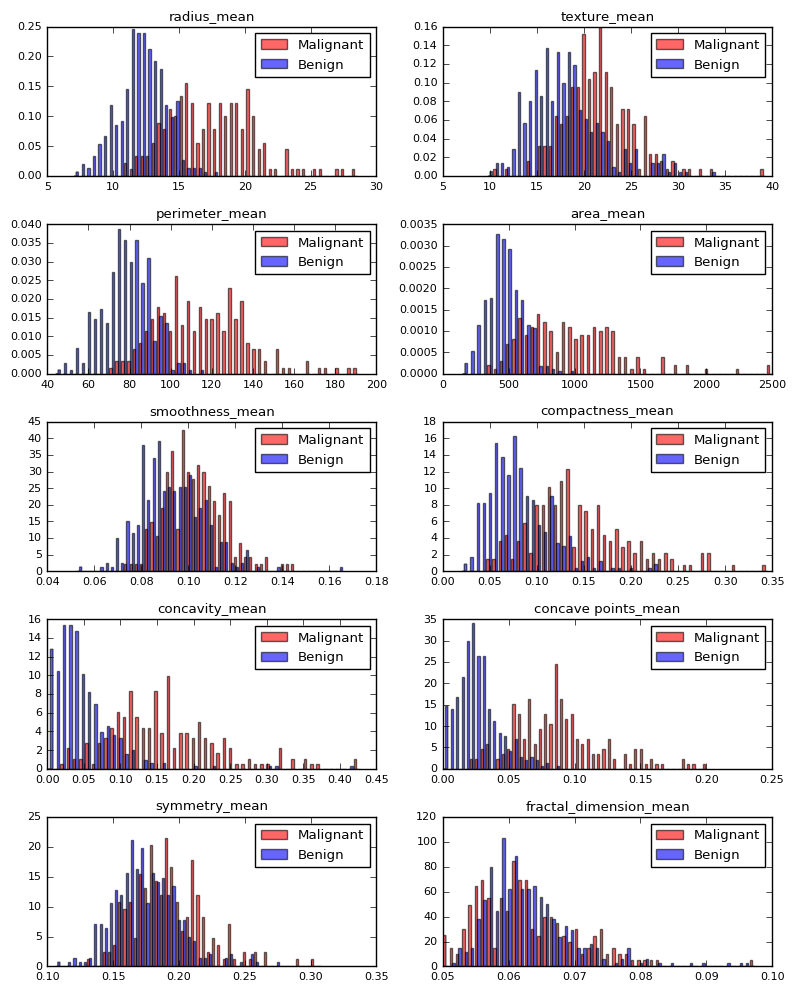

In [8]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,axis in enumerate(axes):
    axis.figure
    
    binwidth= (max(df[observe[idx]]) - min(df[observe[idx]]))/50
    bins = np.arange(min(df[observe[idx]]), max(df[observe[idx]]) + binwidth, binwidth)
    axis.hist([malignant[observe[idx]],benign[observe[idx]]], bins=bins, alpha=0.6, normed=True, label=['Malignant','Benign'], color=['red','blue'])
    axis.legend(loc='upper right')
    axis.set_title(observe[idx])
plt.tight_layout()

### Observations

Visually it can be observed that radius, perimeter, area, concavity and concave points can be used to differentiate and describe the difference between Malignant and Benign tumors.

The importance of this data can be used to trim off less usful data for the learning phase. We can confirm this finding by performing and visualizing principal component analysis on the data.

## Principal Component Analyis

The purpose for doing principal component analysis on labeled data here is to observe the variance explained by each of the components. It is easier to observe correlation between attributes as well.

In [9]:
from sklearn.decomposition import PCA
observables = df.iloc[:,1:11]

pca = PCA(n_components=3)
pca.fit(observables)

# Dimension indexing
dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

# Individual PCA Components
components = pd.DataFrame(np.round(pca.components_, 4), columns = observables.keys())
components.index = dimensions

# Explained variance in PCA
ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
variance_ratios.index = dimensions

print(pd.concat([variance_ratios, components], axis = 1))

             Explained Variance  radius_mean  texture_mean  perimeter_mean  \
Dimension 1              0.9997       0.0099        0.0039          0.0680   
Dimension 2              0.0001      -0.0772       -0.7783         -0.6214   
Dimension 3              0.0001      -0.1024        0.6279         -0.7699   

             area_mean  smoothness_mean  compactness_mean  concavity_mean  \
Dimension 1     0.9976           0.0000            0.0001          0.0002   
Dimension 2     0.0462          -0.0002           -0.0037         -0.0039   
Dimension 3     0.0510          -0.0008           -0.0036         -0.0027   

             concave points_mean  symmetry_mean  fractal_dimension_mean  
Dimension 1               0.0001         0.0000                 -0.0000  
Dimension 2              -0.0015        -0.0009                 -0.0001  
Dimension 3              -0.0017        -0.0010                 -0.0001  


### Observations

It can be observed that **99.97%** of the variance can be explained in dimension 1. This means that nearly all of the variance in the data can be described by one dimension. The remaining two dimensions describe an insignificant ammount of variance. 

In dimension 1, most of the feature weight is associated with the **area_mean** dimension. While I will not be using PCA in the actual machine learning phase, this describes the data well especially when also observing the graphs in the previous step.

Area_mean is important at describing whether a tumor is benigin or malignant and also important at describing the variance in the data. Many of the other features are likely strongly correlated with area_mean. To observe this, let us graph a scatter matrix:

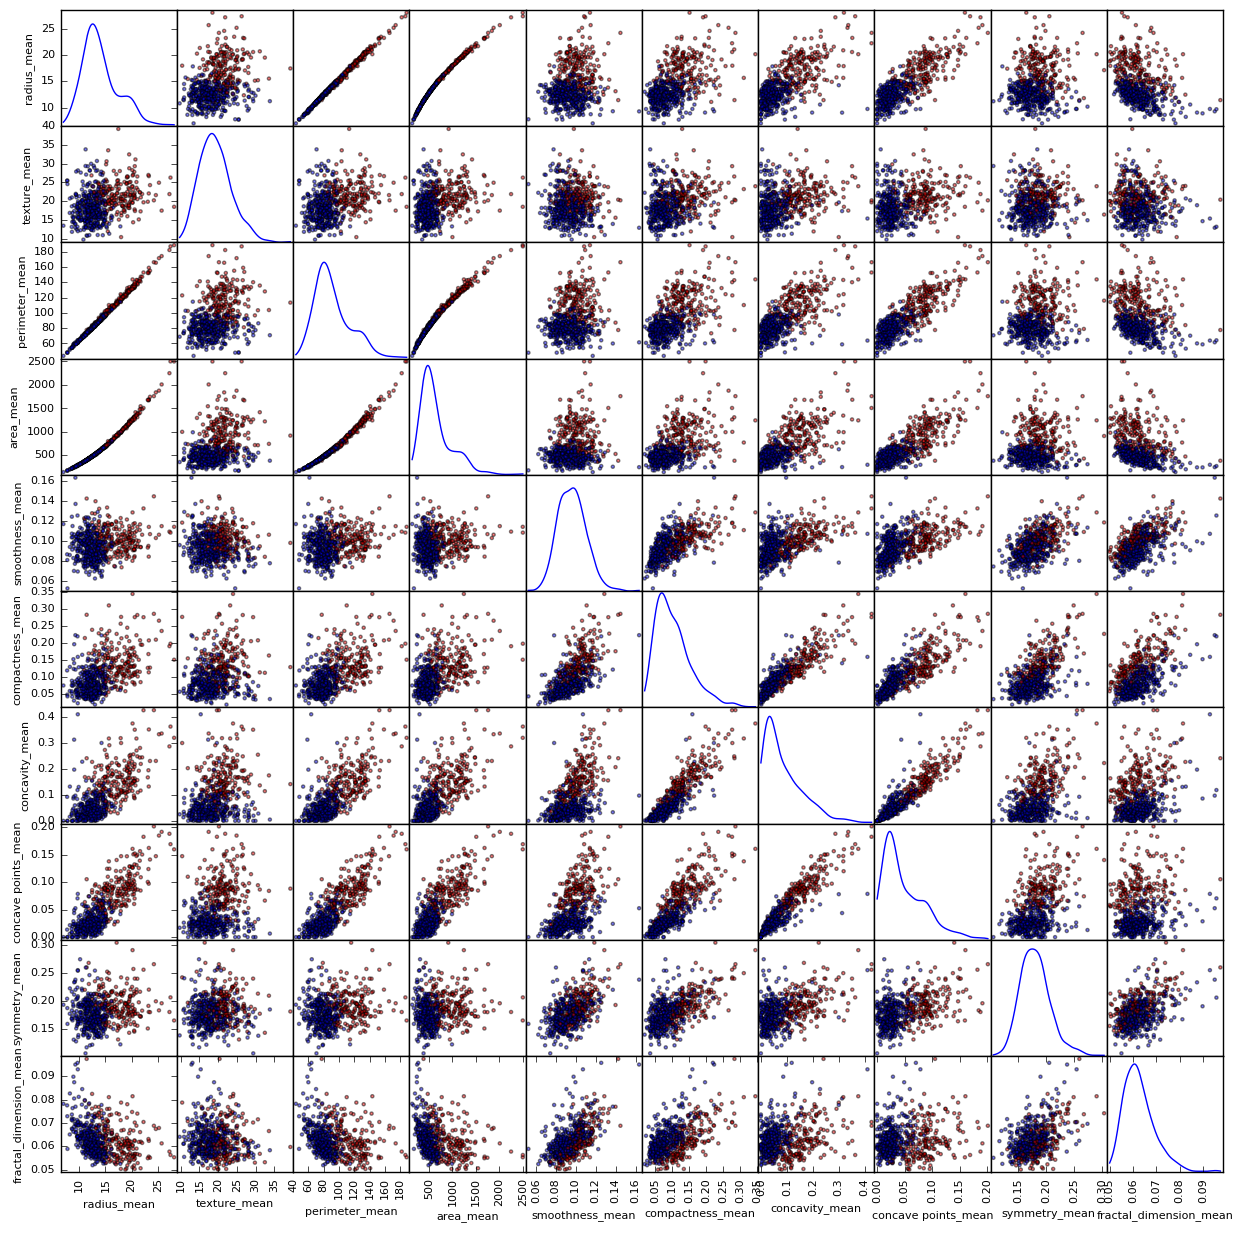

In [10]:
color_wheel = {0: "blue", 1: "red"}
colors = df["diagnosis"].map(lambda x: color_wheel.get(x))
pd.scatter_matrix(observables, c=colors, alpha = 0.5, figsize = (15, 15), diagonal = 'kde');

### Observations

The scatter matrix above provides some expected results. The perimeter_mean, area_mean, and radius mean have a strong, positive, linear correlation. Most other data also has a more rough linear correlation to other features except **fractal_dimension_mean** and **symmetry_mean** which are less well defined.

These observations align with prior assumptions. The area has little to do with the symmetry and fractal dimension, however the smoothness and compactness can be used to describe these two features better.

It is also important to note that the data looks linearly separable in nearly every scatter plot shown above. This may mean there are simple machine learning techniques that could be used to diagnose the type of tumor instead of using more complex implementations.

#### Trimming Data
From observing the graphs and PCA data above: fractal_dimension_mean, smoothness_mean and symmetry_mean are not very useful in predicting the type of cancer. To aid in the learning process and remove noise, these columns will be dropped.

In [11]:
# Drop columns that do not aid in predicting type of cancer
observables.drop(['fractal_dimension_mean', 'smoothness_mean', 'symmetry_mean'],axis=1,inplace=True)

# Classification

Here a comparison will be made between the different types of learning algorithms. At the end a breakdown of the data and explanation of the algorithm's performance will be made.

In [12]:
# Split data appropriately
X = observables
y = df['diagnosis']

### Naive Bayes

In [13]:
gnb = GaussianNB()
gnb_scores = cross_val_score(gnb, X, y, cv=10, scoring='accuracy')
print(gnb_scores.mean())


0.912482715409


Gaussian Naive Bayes had an accuracy score of **0.92**. While this is not ideal, it is not a terrible score to attain using an algorithm as simple as Naive Bayes. NB performed well because, as seen above, much of the data is linearly separable. 

### KNN

In [14]:
# Decide what k should be for KNN
knn = KNeighborsClassifier()

k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
param_grid = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options, 'algorithm': algorithm}

In [15]:
rand_knn = RandomizedSearchCV(knn, param_grid, cv=10, scoring="accuracy", n_iter=100, random_state=42)
rand_knn.fit(X,y)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params={}, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='accuracy', verbose=0)

It looks as though any value for K past 20 would work well but the simpler the better.

In [16]:
print(rand_knn.best_score_)
print(rand_knn.best_params_)
print(rand_knn.best_estimator_)

0.899824253076
{'weights': 'distance', 'n_neighbors': 28, 'leaf_size': 12, 'algorithm': 'ball_tree'}
KNeighborsClassifier(algorithm='ball_tree', leaf_size=12, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=28, p=2,
           weights='distance')


#### KNN Findings

Utilizing Randomized hyper parameter search along with cross validation resulted in a KNN model with an accuracy score of **0.90**. The model that was chosen by *RandomizedSearchCV* is as follows: {'weights': 'distance', 'n_neighbors': 28, 'leaf_size': 12, 'algorithm': 'ball_tree'}.

I do not believe KNN is optimal for this problem so a more involved comparison of results will be made after several more tests.

### Decision Tree Classifier

In [17]:
dt_clf = DecisionTreeClassifier(random_state=0)


max_features = ['auto', 'sqrt', 'log2']
min_samples_split = list(range(2, 10))
min_samples_leaf = list(range(1, 10))
param_grid = {'max_features': max_features, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

In [18]:
rand_dt = RandomizedSearchCV(dt_clf, param_grid, cv=10, scoring="accuracy", n_iter=100, random_state=42)
rand_dt.fit(X,y)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'),
          fit_params={}, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='accuracy', verbose=0)

In [19]:
print(rand_dt.best_score_)
print(rand_dt.best_params_)
print(rand_dt.best_estimator_)

0.917398945518
{'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=9, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')


#### Decision Tree Findings

Utilizing Randomized hyper parameter search along with cross validation resulted in a Decision Tree Classificaiton model with an accuracy score of **0.92**. The model that was chosen by *RandomizedSearchCV* is as follows: {'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}.